In [22]:
#Import dependencies
from gensim.models import LdaModel
import pickle as pkl
import numpy as np
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
# Optimal number of topics
nTopics = 25

In [24]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod': '#DAA520',
 'lawngreen': '#7CFC00',
 'lightcoral': '#F08080',
 'lightpink': '#FFB6C1',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'yellow': '#FFFF00',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32'}

# turn into a list
colorlist = []
for color in custom_colors.values():
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))

In [25]:
# Define topic names
topic_names = [
    'Precipitation Variability & Extremes',
    'Hydrogeochemistry',
    'Uncertainty',
    'Soil Moisture',
    'Statistical Hydrology',
    'Rainfall-Runoff',
    'Precipitation Observation',
    'Modeling & Calibration',
    'Water Management',
    'Snow Hydrology',
    'Streamflow Processes',
    'Water Quality',
    'Channel Flow',
    'Floods',
    'Sediment & Erosion',
    'Climate Change',
    'Subsurface Flow & Transport',
    'Scaling & Spatial Varaibility',
    'Land Surface Fluxes',
    'Hydrogeology',
    'Human Interventions & Effects',
    'Land Cover',
    'Systems Hydrology',
    'Modeling & Forecasting',
    'Groundwater'
]

In [26]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_{nTopics}')

In [27]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_{lda_model.num_topics}.npy')

In [28]:
# Load raw corpus dataframe
with open('data/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

In [29]:
# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)

In [30]:
# calculate time series

#create an array of years
years = np.unique(corpus_df['Year'])

#Create an array of zeros shaped (n_years,n_topics)
topic_distributions_by_year = np.zeros([len(years), lda_model.num_topics])

#for count = y, value = year in years 1991 to 2019
for y, year in enumerate(years):
    #topic distributions over documents for each year
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    # individual topic distributions in a year
    a = np.sum(hm_year, axis=0)
    #sum of topic distributions in a year
    b = np.sum(hm_year)
    #array of topic distributions by year 
    topic_distributions_by_year[y,:] = a / b

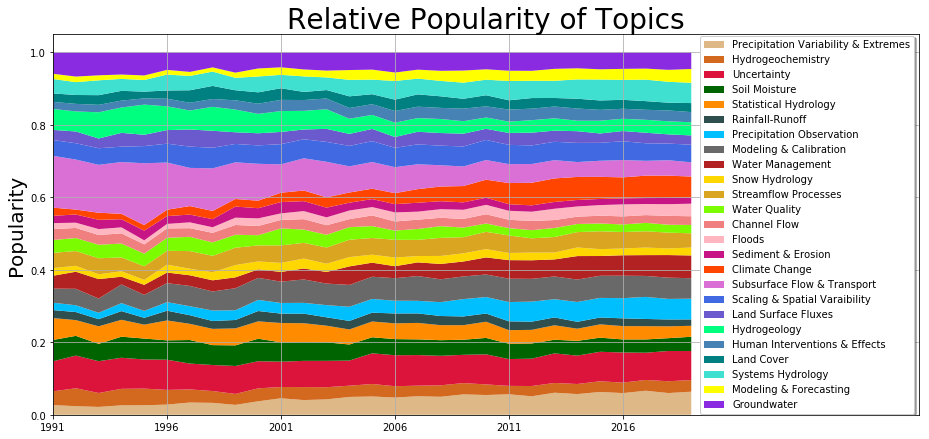

In [73]:
# Plot relative time series
fig = plt.figure(figsize=(21, 7))
gs = fig.add_gridspec(1,4)

ax1 = fig.add_subplot(gs[0, :3])
# colorlist_rgb = []
# for i in range(lda_model.num_topics):
#     r, g, b = colorlist[i] 
#     colorlist_rgb[i] = (r / 255., g / 255., b / 255.)
ax1.stackplot(years, topic_distributions_by_year.transpose(),labels=topic_names[i], colors=list(custom_colors.values()))#, baseline="zero")
ax1.legend(topic_names, loc='center right', shadow=True)
ax1.set_xticks(years[::5])
ax1.set_xlim([years[0], 38])
ax1.set_ylabel('Popularity', fontsize=20)
ax1.set_title('Relative Popularity of Topics', fontsize=28)
ax1.grid()

# Save figure
plt.savefig('figures/stack_streamgraph_relative_topics.png')